## BE de detection d'anomalies


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('data/dataset.csv')
data

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237
...,...,...,...,...,...,...,...,...,...,...,...,...
162697,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.150407,0.029841,0.111318,-1.663704,0.614371,0.432218
162698,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.177867,0.029841,0.113368,-1.663704,0.614371,0.432218
162699,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218
162700,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.232045,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218


In [10]:
data.describe()

In [25]:
def day_cycle_window(txt):
    res = txt.split('_')
    return([int(res[0]),int(res[1]),int(res[2])])

In [27]:
day_cycle_window("1_2_3")[0]

1

In [15]:
data.corr()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
p1,1.000000,0.743804,0.565838,0.645121,0.624481,0.613244,0.639742,0.560869,-0.503502,-0.163234,0.563531
p2,0.743804,1.000000,0.682531,0.772694,0.752933,0.722363,0.775408,0.678819,-0.567669,-0.192766,0.650339
p3,0.565838,0.682531,1.000000,0.675952,0.668370,0.583064,0.517204,0.579898,-0.605091,0.110260,0.918913
p4,0.645121,0.772694,0.675952,1.000000,0.744707,0.740058,0.699865,0.575245,-0.607031,-0.212327,0.623993
p5,0.624481,0.752933,0.668370,0.744707,1.000000,0.669007,0.717467,0.624363,-0.574300,-0.115710,0.627748
p6,0.613244,0.722363,0.583064,0.740058,0.669007,1.000000,0.759859,0.635648,-0.547077,-0.249565,0.534820
p7,0.639742,0.775408,0.517204,0.699865,0.717467,0.759859,1.000000,0.668587,-0.532341,-0.309137,0.497391
p8,0.560869,0.678819,0.579898,0.575245,0.624363,0.635648,0.668587,1.000000,-0.510558,-0.136902,0.595250
p9,-0.503502,-0.567669,-0.605091,-0.607031,-0.574300,-0.547077,-0.532341,-0.510558,1.000000,0.079156,-0.630761
p10,-0.163234,-0.192766,0.110260,-0.212327,-0.115710,-0.249565,-0.309137,-0.136902,0.079156,1.000000,0.202441


Text(0, 0.5, 'p11')

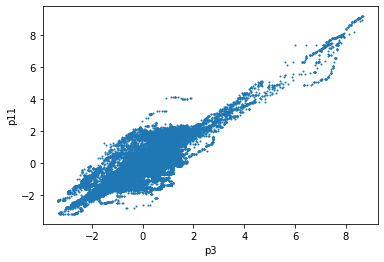

In [19]:
plt.scatter(data['p3'],data['p11'],s=1)
plt.xlabel('p3')
plt.ylabel('p11')

In [ ]:
#Representation d'une variable sur un cycle
plt.scatter(data['p3'])

In [35]:
#decrire des features sur chaque variable (moyenne, ecart type,....)
#sur chaque variable, on prend la moyenne par fenêtre
mean_data = data.groupby(by='day_cycle_window').mean()
    

In [41]:
#ACP la dessus
from sklearn.decomposition import PCA
acp = PCA(n_components=11,svd_solver='full')
acp.fit(mean_data)
acp.explained_variance_ratio_

array([0.62906609, 0.12725862, 0.04539754, 0.04342628, 0.03657464,
       0.03225765, 0.02769817, 0.0209818 , 0.01837911, 0.01423389,
       0.00472622])

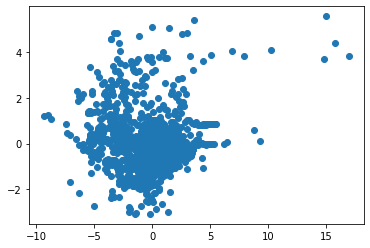

In [44]:
X_ppal=acp.components_[0]
Y_ppal= acp.components_[1]
plt.scatter(np.dot(mean_data,X_ppal),np.dot(mean_data,Y_ppal)) #a verifier groooos voir TP avec R

In [45]:
#idees, faire de meme avec les coeff de fourier des variables, l'écart type etcc